<a href="https://colab.research.google.com/github/JimQuejado/Emerging-Technology-2---FInal-Project-QUEJADO-SERRANO/blob/main/13._Quejado_Assignment_10_2_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPE019 : Assignment 10.2 - ARIMA Model**


---


**Name:** QUEJADO,  Jimlord M. <br>
**Course and Section:** CPE019-CPE32S3 <br>
**Date of Submission**: May 4, 2024<br>
**Instructor:** Engr. Roman Richard<br>

---


# **Part 1: Do the following tasks**

1. Load time series data: data.csvDownload data.csv
2. Visualize the time series
3. Fit an ARIMA Model (baseline model order = (1,1,1))
4. Improve the ARIMA Model
5. Print the model summary
6. Make a forecast (steps=10)
7. Plot the forecast
8. Perform a grid search


## **Load time series data: data.csvDownload data.csv**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-2-86daafd64515>:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/CPE019: Assignment 10.2/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


            CO2 (ppm)
Month                
1965-01-01     319.32
1965-02-01     320.36
1965-03-01     320.82
1965-04-01     322.06
1965-05-01     322.17


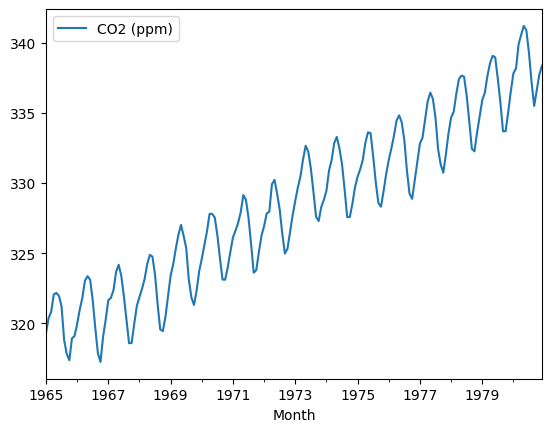

In [ ]:
from pandas import read_csv
import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.datetime.strptime(x,'%Y-%m')

series = read_csv('/content/drive/MyDrive/CPE019: Assignment 10.2/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

### **Remarks**

The code above loaded the time series data set that has two columns  the month and the the CO2 ppm. It also provided a visualization that helps in the substantial increase in the trend over the months passed.


## **Visualize the time series**


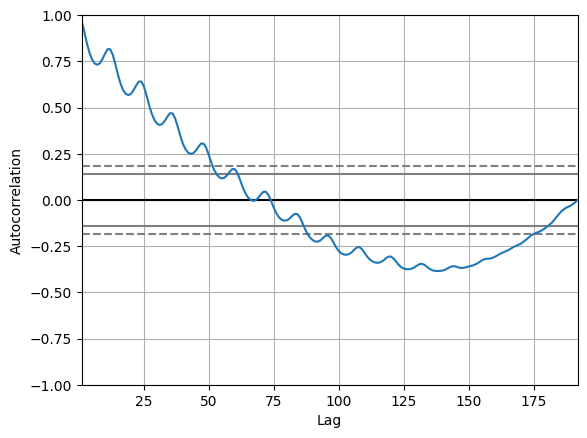

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

### **Remarks**



The graph above is a autocorrelation plot where it shows whether the element of the time-series data is positively correlated, negatively correlated, or independent depending on its placement in the zero line or the horizontal line at point 0 in the graph above[1][2].

---

References:

[1] "Autocorrelation Plots: Graphical Technique for Statistical Data," Dummies.com. [Online]. Available: https://www.dummies.com/article/technology/information-technology/data-science/big-data/autocorrelation-plots-graphical-technique-for-statistical-data-141241/. [Accessed: 03-May-2024].

[2] J. Brownlee, "A Gentle Introduction to Autocorrelation and Partial Autocorrelation," Machine Learning Mastery. [Online]. Available: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/. [Accessed: 03-May-2024].

## **Fit an ARIMA Model (baseline model order = (1,1,1))**


In [ ]:
import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):
	return datetime.datetime.strptime(x, '%Y-%m')
series = read_csv('/content/drive/MyDrive/CPE019: Assignment 10.2/data.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()


<ipython-input-4-1325a9df101c>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/CPE019: Assignment 10.2/data.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)


### **Remarks:**



In the code above, it created a baseline model inorder to have a comparison the future arima models. The documentation of the ARIMA() the parameters used in the code above are as follows[3]:

endog:  the observed series, in this case the `series` contains the seies to be processed [3]

order: The (p,d,q) order of the model for the autoregressive, differences, and moving average components. d is always an integer, while p and q may either be integers or lists of integers. [3]


---

References:

[3] "statsmodels.tsa.arima.model.ARIMA — statsmodels," Statsmodels Documentation. [Online]. Available: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html. [Accessed: 03-May-2024].




## Summary of the model

In [ ]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Sat, 04 May 2024   AIC                            457.638
Time:                        11:56:42   BIC                            467.395
Sample:                    01-31-1965   HQIC                           461.590
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

### **Remarks**:

In the summary above, it showed 3 sections. The first section includes the basic details about the series, model order and the goodness of fit represented by Log Likelihood, AIC, BIC, HQIC [4]. The next section is the parameters where Coefficients, standard deviation, z and p > [z] statistics, confidence interval and sigma2 [4]. The last section is about the residuals that helps greatly in determining wheter the model is good fit or not by ensuring that the pattern and only white noise is included[4]


---

Reference:

[4] S. Nayak, "Reading ARIMA Results," Medium, May 4, 2024. [Online]. Available: https://medium.com/@sachinnayak18/reading-arima-results-35eb1df7a565. [Accessed: May 4, 2024].

### Visualization

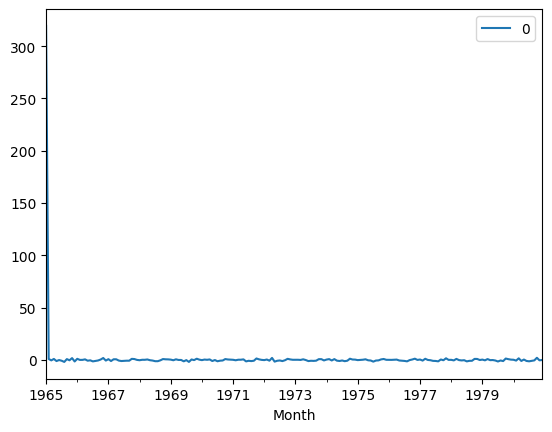

In [ ]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()


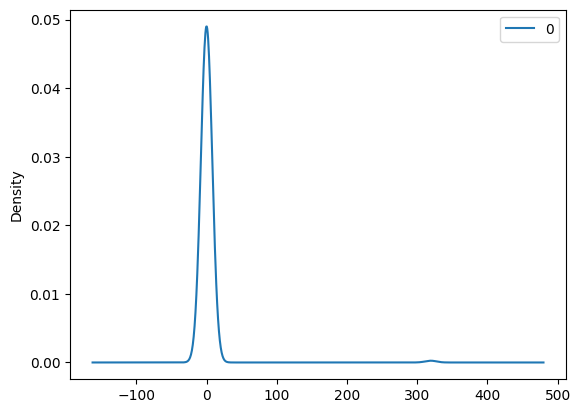

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()


#### **Remarks**




The two plots are used for visualization purposes of the residuals. The first graph is a line plot where it is used to tell differences between the observed and predicted values[5]. In this case, the a clear pattern was formed at 0 where small ups and downs only are observed while there is an outlier around the start of the graph. The next graph is a about the kernel density plot of the residuals. The purpose of this plot is check the distribution of a continuous variable when the data is not normally distributed by visualization [6]. Y axis is the density of each point while X axis is the values of the continuous variable being analyzed [6]. In this case, the peak tells about the mode of the data set while its width tells that the concentration of distribution. In this case, the peak is around 0 with a very thin width indicating that the model's distribution is concentrated.



---
references:

[5] "Residual Plot," Analyse-it. May 4, 2024. [Online]. Available: https://analyse-it.com/docs/user-guide/fit-model/linear/residual-plot. [Accessed: May 4, 2024]

[6] User, "Interpreting kernel density plot," Stack Exchange, May 4, 2024. [Online]. Available: https://stats.stackexchange.com/questions/517798/interpreting-kernel-density-plot. [Accessed: May 4, 2024].

### Summary of stat residuals

In [ ]:
# summary stats of residuals
print(residuals.describe())

                0
count  192.000000
mean     1.698162
std     23.055889
min     -1.760398
25%     -0.571139
50%      0.034938
75%      0.566208
max    319.320000


#### **Remarks**

In this code, the .describe() was used inorder to get a statistical summary of the residuals. It can be seen that there is a presence of anoutlier as shown in the maximum value affecting the standard deviation of the results. The difference of the 75% quartile is significantly larger than the maximum value, therefore resulting to the high dispersion of data from the mean. In addition to that, to determine whether the model is a good fit we also look onto the mean results. A 'best fit' model should result to 0 [7]. In the mean above, the value is 1 where it is greater than 0 meaning it can be still improved.

---

References:

[7] "Residual," Statistics How To, May 4, 2024. [Online]. Available: https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/residual. [Accessed: May 4, 2024].

## **Improve the ARIMA Model**


#### Model 2 : Order (9,2,1)

In [ ]:
model2 = ARIMA(series, order=(9,2,1))
model_fit2 = model2.fit()


In [ ]:
# summary of fit model
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(9, 2, 1)   Log Likelihood                -109.931
Date:                Sat, 04 May 2024   AIC                            241.862
Time:                        12:17:06   BIC                            277.579
Sample:                    01-31-1965   HQIC                           256.330
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0666      0.074      0.905      0.366      -0.078       0.211
ar.L2         -0.1208      0.063     -1.925      0.054      -0.244       0.002
ar.L3         -0.3790      0.058     -6.589      0.0

In [ ]:
# summary stats of residuals
residuals2 = DataFrame(model_fit2.resid)
print(residuals2.describe())

                0
count  192.000000
mean     0.860459
std     25.788444
min   -158.620092
25%     -0.242875
50%      0.063546
75%      0.289945
max    319.320000


##### **Remarks:**

As shown in the results above, the model improved slightly as the mean is now closer to 0 compared to the previous results which is greater than 1.

### Model 3: Order (1,2,3)

In [ ]:
model3 = ARIMA(series, order=(1,2,3))
model_fit3 = model3.fit()


In [ ]:
# summary of fit model
print(model_fit3.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -215.841
Date:                Sat, 04 May 2024   AIC                            441.682
Time:                        12:16:42   BIC                            457.917
Sample:                    01-31-1965   HQIC                           448.259
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3825      0.140      2.724      0.006       0.107       0.658
ma.L1         -0.4704     22.759     -0.021      0.984     -45.077      44.136
ma.L2         -0.1176     11.997     -0.010      0.9

In [ ]:
# summary stats of residuals
residuals3 = DataFrame(model_fit3.resid)
print(residuals3.describe())

                0
count  192.000000
mean     0.824051
std     25.796585
min   -158.620066
25%     -0.567090
50%     -0.065218
75%      0.453740
max    319.320000


##### **Remarks**

As shown in the mean, the results of this is lower than the previous models meaning that the model is slightly better as it is more close to zero.

## **Make a forecast (steps=10)**


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Splitting into train and test sets
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (1,2,3))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(series), len(series)+10, typ = 'levels')

In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1981-01    338.084021
1981-02    338.188157
1981-03    338.292292
1981-04    338.396428
1981-05    338.500564
1981-06    338.604699
1981-07    338.708835
1981-08    338.812970
1981-09    338.917106
1981-10    339.021241
1981-11    339.125377
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  4.274995900616168
RMSE:  2.067606321478092


### **Remarks**

In the code, the mode was fitted and the MSE and RMSE was calcuted. The closer the value of RMSE and MSE to 0 the better the model is. As there is no baseline for this yet, this value will be later compared after performing a grid search to determine if the maually hyper tuned model is better in forcasting or not.

## **Plot the forecast**


In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

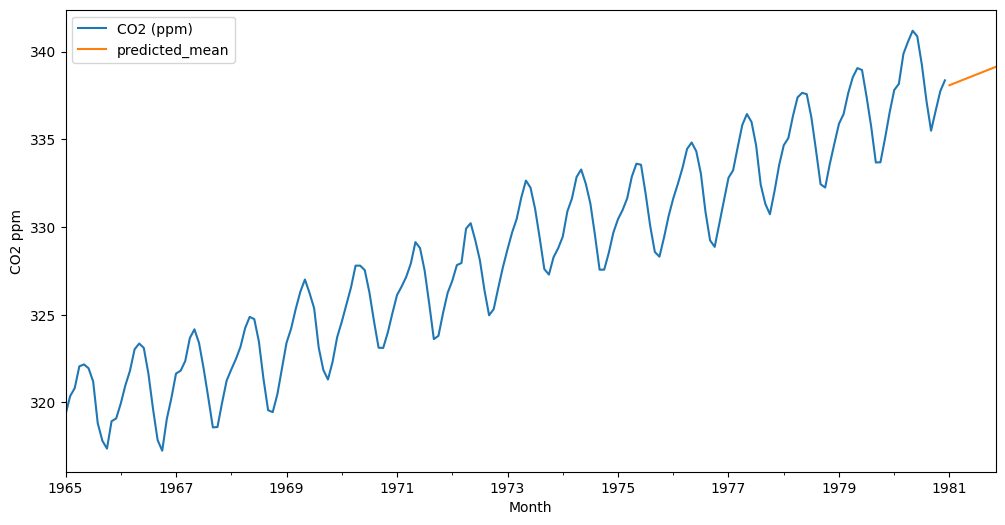

In [ ]:
ylabel='CO2 ppm'
xlabel='Month'

ax = series.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### **Remarks**


As shown in the graph, the prediction does not follow the trend and indicates that the model can be still hypertuned to have a better forecasting.

## **Perform a grid search**

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(series) * 0.75)
  train_data, test_data = series[0:train_size], series[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(series), len(series)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(series, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.208
ARIMA(0, 3, 2) MSE=945.481
ARIMA(0, 3, 3) MSE=1022.852
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.356
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.275
ARIMA(1, 3, 0) MSE=75819.084
ARIMA(1, 3, 1) MSE=1087.634
ARIMA(1, 3, 2) MSE=1026.289
ARIMA(1, 3, 3) MSE=1016.551
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.992
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

### **Remarks**:
In the code above, we can see that all of the different combinations of p, d, and q are fitted on the model to check the best combination. Among all the testing, the results showed that the 10,2,2 combination has the lowest MSE. This is the process of a grid search a hypertuning method, where it creates a grid of all the possible combinations in the given range and using it to hypertune the model [8].

---

References:
[8] "Grid Search," scikit-learn, May 4, 2024. [Online]. Available: https://scikit-learn.org/stable/modules/grid_search.html. [Accessed: May 4, 2024].

## **Testing the Results of Grid Search**

### Forecasting the next 10 steps

In [ ]:
# Splitting into train and test sets
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (9,2,0))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(series), len(series)+10, typ = 'levels')

In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1981-01    338.829450
1981-02    339.410077
1981-03    339.846441
1981-04    339.951027
1981-05    339.624439
1981-06    338.996781
1981-07    338.387871
1981-08    338.097810
1981-09    338.219246
1981-10    338.635268
1981-11    339.168786
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  1.1498843083979555
RMSE:  1.0723265866320557


### **Remarks**

Compared to the previous MSE and RMSE, the values above are significantly lower indicating that the model created this time with hyper tuned parameters from the grid search is better as in has a low error tendency.

### **Summary and Visualization**

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

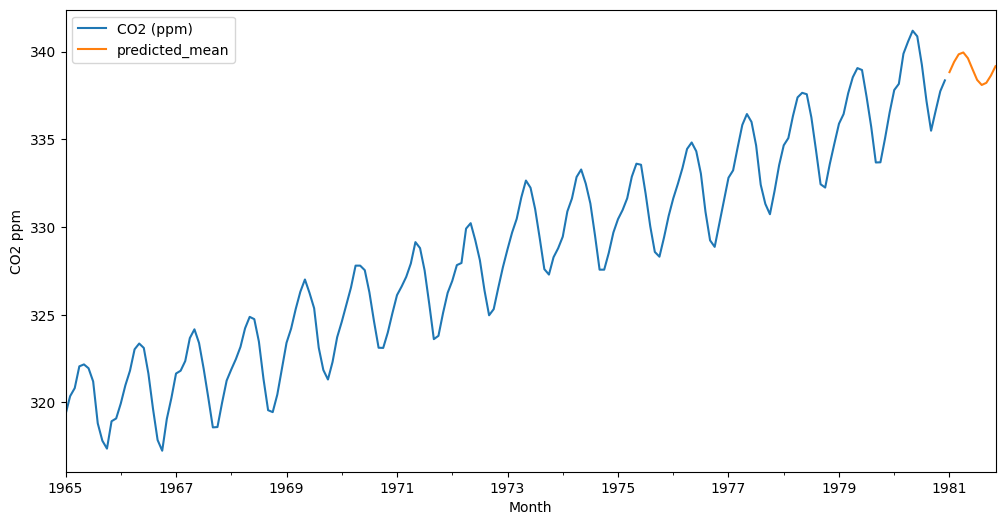

In [ ]:
ylabel='CO2 ppm'
xlabel='Month'

ax = series.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

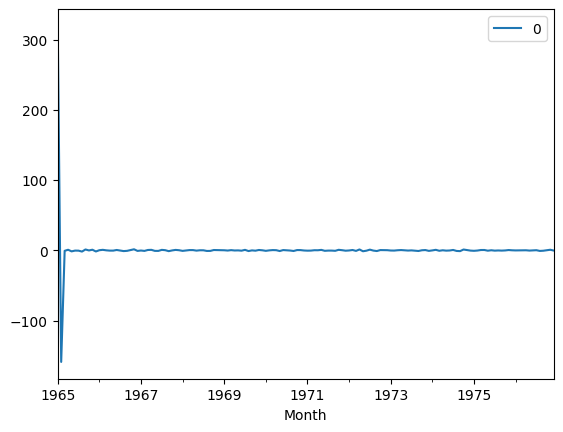

In [ ]:
# line plot of residuals
residuals = DataFrame(results.resid)
residuals.plot()
pyplot.show()


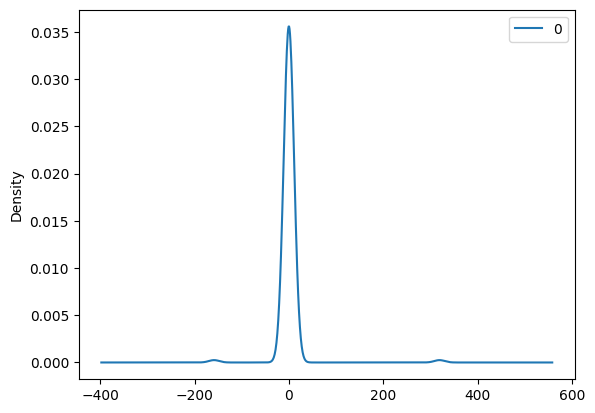

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()


#### **Remarks**



As shown in the graphs above, in contrary to the baseline model the KDE imrpoved with a more concentrated distribution and the jitters on the line plot of residuals are not seen anymore. Thus, implying a better ARIMA model given the range of p,q and d values. In addition to that, it can be also seen in the trend is followed in the predicted forecast. Although it is simmilar, using wider range in the grid search may help in getting a better hypertuned model.

# **Supplementary Activity**

## **Load time series data:**

<ipython-input-1-4c9d9c40831b>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv(path , header=0, parse_dates=[0], index_col=0, date_parser=parser)


            Mean monthly temperature
Month                               
1907-01-01                      33.3
1907-02-01                      46.0
1907-03-01                      43.0
1907-04-01                      55.0
1907-05-01                      51.8


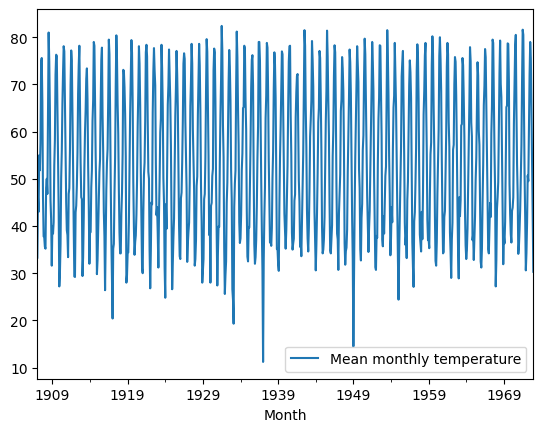

In [ ]:
from pandas import read_csv
import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.datetime.strptime(x,'%Y-%m')


path = '/content/dataset_temperature.csv'

series = read_csv(path , header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

### **Remarks:**

The data was loaded successfully and as shown in the visualization, there is no visible trend in the data but only a up and down between a specific interval of months.

## **Visualize the time series**

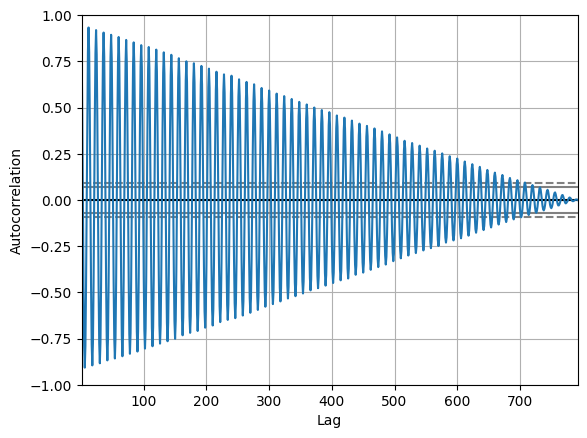

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

### **Remarks**




As mentioned earlier this graph is a autocorrelation plot where it shows whether the element of the time-series data is positively correlated, negatively correlated, or independent depending on its placement in the zero line or the horizontal line at point 0 in the graph above[1][2]. In the results above, it can been that as the lag increases the correlaation becomes closer to 0 indicating no correlation.

References:

[1] "Autocorrelation Plots: Graphical Technique for Statistical Data," Dummies.com. [Online]. Available: https://www.dummies.com/article/technology/information-technology/data-science/big-data/autocorrelation-plots-graphical-technique-for-statistical-data-141241/. [Accessed: 03-May-2024].

[2] J. Brownlee, "A Gentle Introduction to Autocorrelation and Partial Autocorrelation," Machine Learning Mastery. [Online]. Available: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/. [Accessed: 03-May-2024].

## **Fit an ARIMA Model (baseline model order = (1,1,1)**

In [ ]:
import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot



series = read_csv(path, header=0, index_col=0, parse_dates=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()


<ipython-input-3-9990e60acad0>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv(path, header=0, index_col=0, parse_dates=True, date_parser=parser)


### **Remarks**

In the code, a base ARIMA model using order 1,1,1 was used.


## **Summary of model**

In [ ]:
# summary of fit model
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2773.596
Date:                      Sat, 04 May 2024   AIC                           5553.192
Time:                              11:29:34   BIC                           5567.212
Sample:                          01-31-1907   HQIC                          5558.581
                               - 12-31-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.060      9.104      0.000       0.428       0.663
ma.L1         -0.0333      0.072     -0.462      0.644      -0.174       0.108
sigm

### **Remarks**:

In the code, the model that was created basic details was shown along with the parameters used. The fit of the model as shown in the first segment shows that the base model is not yet the best fit as shown in the log likelihood, aic, bic and hqic values.

### **Visualization**

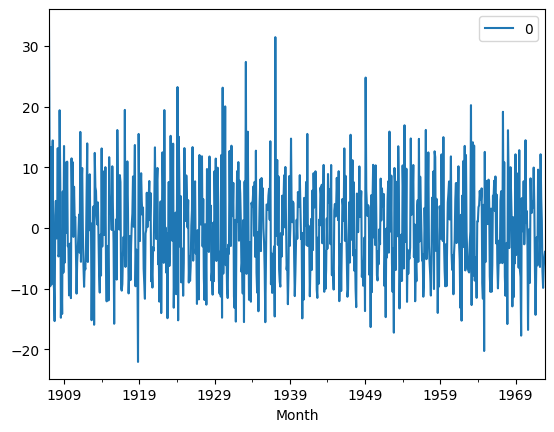

In [ ]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()


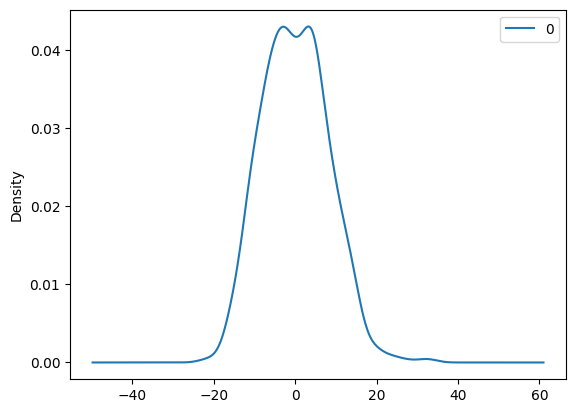

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()


#### **Remarks:**

The visualization of the residuals as shown above show that that there are two peaks meaning that there are two modes. In addition to that, the width of the peak tells that the distribution of data is wide and can be still narrowed to ha ve a more concentrated distribution. On the other hand the line plot shows that there are a lot of noise that can still be fine tuned.

### **Summary of stat residuals**

In [ ]:
# summary stats of residuals
print(residuals.describe())

                0
count  792.000000
mean     0.033157
std      8.152946
min    -22.090284
25%     -5.966691
50%     -0.197062
75%      5.394914
max     33.300000


### Remarks:

As shown above, the mean is close to 0 meaning that the residuals is low closer to 0. Another thing the maximum value is also relatively bigger than the 75% percentile indicating some outliers that affects the standard deviation of the data. This will be later compared after performing the grid search to check if improvements are present

## **Improve ARIMA Model**

### **Model 2 (order( ) )**

In [ ]:
model2 = ARIMA(series, order=(2,0,2))
model_fit2 = model2.fit()


In [ ]:
# summary of fit model
print(model_fit2.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(2, 0, 2)   Log Likelihood               -2282.794
Date:                      Sat, 04 May 2024   AIC                           4577.588
Time:                              11:49:21   BIC                           4605.635
Sample:                          01-31-1907   HQIC                          4588.367
                               - 12-31-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5621      0.168    318.371      0.000      53.232      53.892
ar.L1          1.7319      0.000   1.27e+04      0.000       1.732       1.732
ar.L

In [ ]:
# summary stats of residuals
residuals2 = DataFrame(model_fit2.resid)
print(residuals2.describe())

                0
count  792.000000
mean    -0.049195
std      4.406534
min    -20.262098
25%     -2.750014
50%      0.351188
75%      2.883612
max     12.629136


### **Remarks**

As shown, the model slightly imrpoved especially the standard deviation indicating closer values to the mean resulting to better dispersion of the data.

### **Model 3 (order = () )**

In [ ]:
model3 = ARIMA(series, order=(2,0,3))
model_fit3 = model3.fit()


In [ ]:
# summary of fit model
print(model_fit3.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(2, 0, 3)   Log Likelihood               -2249.271
Date:                      Sat, 04 May 2024   AIC                           4512.542
Time:                              11:49:24   BIC                           4545.264
Sample:                          01-31-1907   HQIC                          4525.118
                               - 12-31-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.3315      0.194    274.970      0.000      52.951      53.712
ar.L1          1.7322      0.000   1.62e+04      0.000       1.732       1.732
ar.L

In [ ]:
# summary stats of residuals
residuals3 = DataFrame(model_fit3.resid)
print(residuals3.describe())

                0
count  792.000000
mean     0.137268
std      4.216932
min    -20.031532
25%     -2.364704
50%      0.506094
75%      2.865294
max     13.090882


### **Remarks**

On contrary to the model above, this model is slightly worse as it has a higher standard deviation to the second model. Nevertheless, it is still better than the base model.

## **Make a forecast (steps = 10)**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Splitting into train and test sets
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (1,1,1))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(series), len(series)+10, typ = 'levels')

In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1973-01    80.89335
1973-02    80.89335
1973-03    80.89335
1973-04    80.89335
1973-05    80.89335
1973-06    80.89335
1973-07    80.89335
1973-08    80.89335
1973-09    80.89335
1973-10    80.89335
1973-11    80.89335
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  967.959884610114
RMSE:  31.112053686796603


### Remarks:

The forcasting results in this section shows a very high MSE and RMSE indicating that the forcast capabilities of the model is bad.

## **Plot the forecast**

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

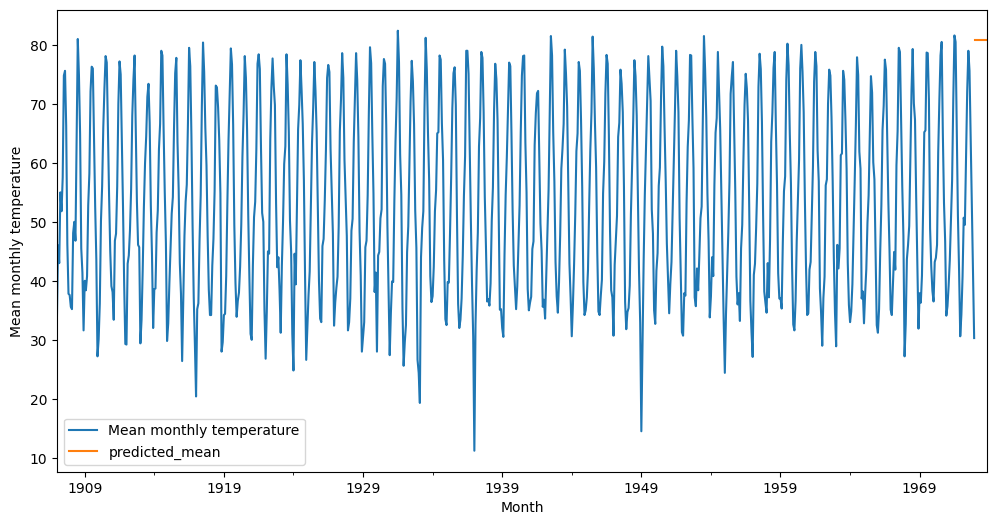

In [ ]:
ylabel='Mean monthly temperature'
xlabel='Month'

ax = series.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### **Remarks**

As shown in the plot, the predicted mean is very off to the trend that was shown in the time series. This graph will be later compared to the grid search to check the improvements.

## **Perform a Grid Search**

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(series) * 0.75)
  train_data, test_data = series[0:train_size], series[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(series), len(series)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(series, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=244.680
ARIMA(0, 0, 1) MSE=243.522
ARIMA(0, 0, 2) MSE=241.414
ARIMA(0, 0, 3) MSE=240.950
ARIMA(0, 1, 0) MSE=495.038
ARIMA(0, 1, 1) MSE=563.035
ARIMA(0, 1, 2) MSE=762.177
ARIMA(0, 1, 3) MSE=241.416
ARIMA(0, 2, 0) MSE=1244065.976
ARIMA(0, 2, 1) MSE=1228064.281
ARIMA(0, 2, 2) MSE=1375959.214
ARIMA(0, 2, 3) MSE=1226.260
ARIMA(0, 3, 0) MSE=75530369.710
ARIMA(0, 3, 1) MSE=1146520.954
ARIMA(0, 3, 2) MSE=1228598.003
ARIMA(0, 3, 3) MSE=1377305.099
ARIMA(1, 0, 0) MSE=244.502
ARIMA(1, 0, 1) MSE=242.878
ARIMA(1, 0, 2) MSE=242.032
ARIMA(1, 0, 3) MSE=241.498
ARIMA(1, 1, 0) MSE=927.784
ARIMA(1, 1, 1) MSE=967.960
ARIMA(1, 1, 2) MSE=242.927
ARIMA(1, 1, 3) MSE=242.089
ARIMA(1, 2, 0) MSE=1304343.983
ARIMA(1, 2, 1) MSE=1337791.299
ARIMA(1, 2, 2) MSE=1669.347
ARIMA(1, 2, 3) MSE=1745.663
ARIMA(1, 3, 0) MSE=348687760.374
ARIMA(1, 3, 1) MSE=1318914.200
ARIMA(1, 3, 2) MSE=1359137.816
ARIMA(1, 3, 3) MSE=1237604.148
ARIMA(2, 0, 0) MSE=235.314
ARIMA(2, 0, 1) MSE=184.648
ARIMA(2, 0, 2) MSE=16.12

### **Remarks**

The best ARIMA hyper tuned parameter of order given the range indicated above, is (3,0,3) as it has a MSE of 15.664. Compared to the baseline, it has a signifact difference showing an improvement.

### **Forecasting with the best parameters according to grid search**

### Forecasting the next 10 steps

In [ ]:
# Splitting into train and test sets
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (3,0,3))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(series), len(series)+10, typ = 'levels')

In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1973-01    32.790807
1973-02    34.946962
1973-03    42.071251
1973-04    52.263710
1973-05    62.782590
1973-06    70.818363
1973-07    74.208284
1973-08    72.053655
1973-09    64.923482
1973-10    54.738198
1973-11    44.219074
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  15.663553353298553
RMSE:  3.9577207270471413


### Visualization

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

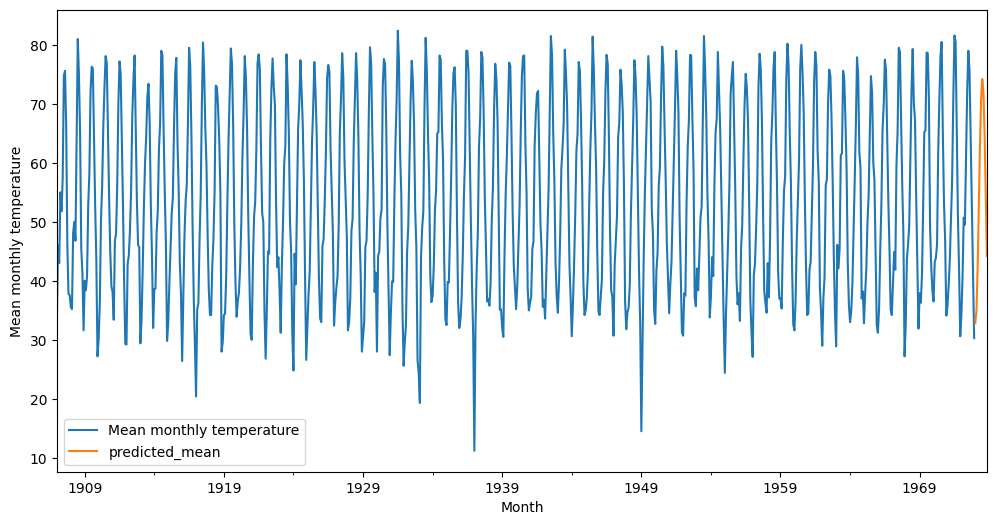

In [ ]:
ylabel='Mean monthly temperature'
xlabel='Month'

ax = series.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

#### Remarks:

As shown in the graph above the forcasted mean followed the trend present in the data indicating a better performance compared to the previous forecast performance.

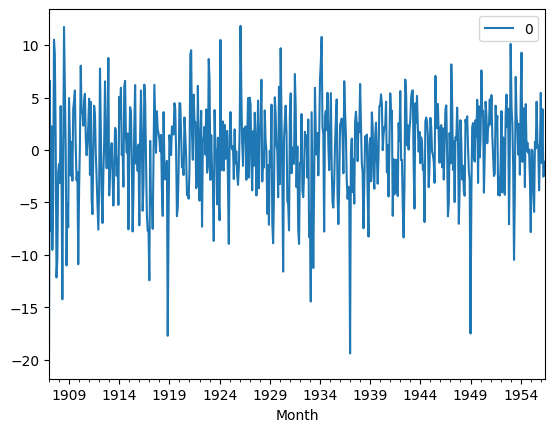

In [ ]:
# line plot of residuals
residuals = DataFrame(results.resid)
residuals.plot()
pyplot.show()


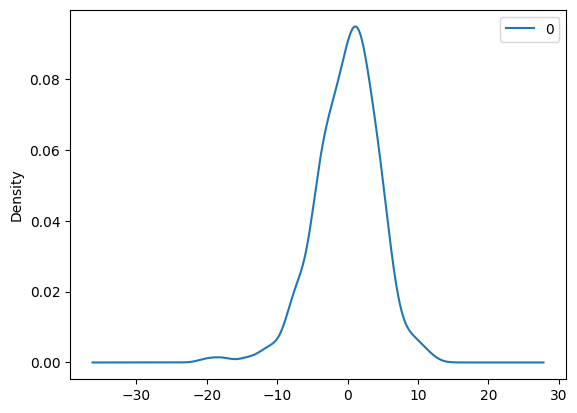

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

#### **Remarks**


As shown in the density plot of residuals, it now only have one peak and a thinner width compared to the baseline model indicating that the model has a more concentrated dispersion but still has a more room of imrpovement. On the other hand, line plot of residuals shows that the points are closer to the middle indicating a better performance compared to the baseline. The model can be still improved in such way that the grid search be performed in a higher ranges of the order parameters.

# **Conclusion**

After conducting the laboratory I learned the following:

1. ARIMA Model for Time Series Forecasting in Python invloves understanding the trends, residuals and parameters to have a good forecasting model.

2. ARIMA makes use of lagged moving averages to smooth time series data.

3. Using the Grid search helps in hypertuning the Arima model order parameter.

4. Increasing the range of values in the grid search helps in fnding a more suitable paramters that has lower MSE.

5. Testing the model make a forecast can help in visualizing the model performance

6. Using the summary command gives details about the model that helps in checking if the model perfomance


To sum up, the activity was helpful in giving  a crash course of the ARIMA in ARIMA Model for Time Series Forecasting.
